In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datadir = 'data/starcraft_player_data.csv'

# EDA
___

In this notebook, we will perform exploratory data analysis. We will start off by inspecting the dataset, here we will search for missing data and get some insight into the type of data we're working with via visualizations. We will then explore the relationships of our features with respect to the target variable `LeagueIndex`.

## Goal:
We want to develop a model to predict a player’s rank using the information provided in the dataset.

## Dataset Dictionary:
* `GameID` : Unique ID number for each game
* `LeagueIndex` : Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8
* `Age` : Age of each player
* `HoursPerWeek` : Reported hours spent playing per week
* `TotalHours` : Reported total hours spent playing
* `APM` : Action per minute 
* `SelectByHotkeys` : Number of unit or building selections made using hotkeys per timestamp
* `AssignToHotkeys` : Number of units or buildings assigned to hotkeys per timestamp
* `UniqueHotkeys` : Number of unique hotkeys used per timestamp
* `MinimapAttacks` : Number of attack actions on minimap per timestamp
* `MinimapRightClicks` : number of right-clicks on minimap per timestamp
* `NumberOfPACs` : Number of PACs per timestamp
* `GapBetweenPACs` : Mean duration in milliseconds between PACs 
* `ActionLatency` : Mean latency from the onset of a PACs to their first action in milliseconds
* `ActionsInPAC` : Mean number of actions within each PAC
* `TotalMapExplored` : The number of 24x24 game coordinate grids viewed by the player per timestamp
* `WorkersMade` : Number of SCVs, drones, and probes trained per timestamp 
* `UniqueUnitsMade` : Unique unites made per timestamp
* `ComplexUnitsMade` : Number of ghosts, infestors, and high templars trained per timestamp
* `ComplexAbilitiesUsed` : Abilities requiring specific targeting instructions used per timestamp

In [2]:
df = pd.read_csv(datadir, na_values='?')
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


Let's begin by inspecting the data. Using pandas `describe()` method we can get an statistical summary of the data, and then we can see if there's any missing data we need to take care of. We make an important note here that we will be dropping `GameID` from the dataset as it usually provides no value to our goal nor statistical analysis.

In [3]:
df.drop('GameID', axis=1, inplace=True)

In [4]:
df.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,1.517327,4.206341,11.962912,17318.133922,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [5]:
df.isnull().sum()

LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

**While manually inspecting the data, I found that there were a few rows that contained the symbol "`?`" which I assumed it represented missing data. Whether or not this was meant to be there, we will treat it as missing data.** Because of this, our analyisis indicates that `Age`, `HoursPerWeek`, and `TotalHours` contain missing values. To better determine how to deal with missing data, let's take a better look to the distribution of the features themselves.

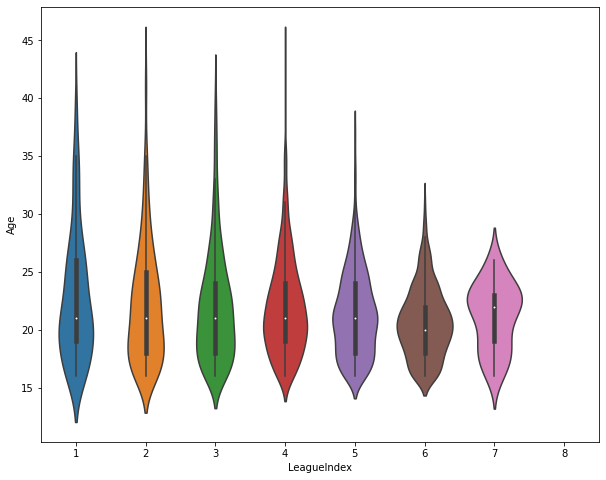

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=df, x='LeagueIndex', y='Age', ax=ax);

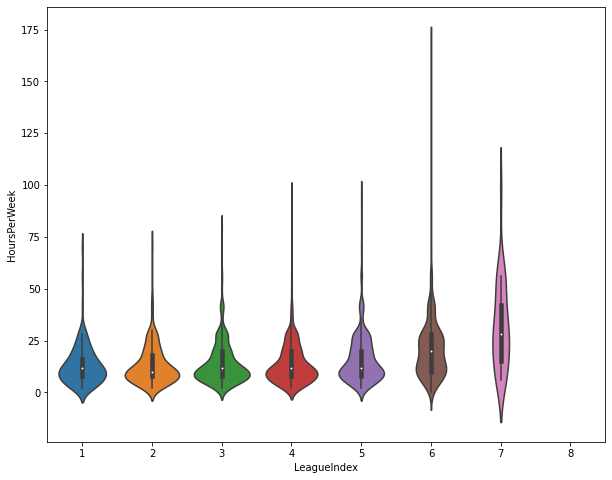

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=df, x='LeagueIndex', y='HoursPerWeek', ax=ax);

Let us discuss the distribuiton of this variables. `Age` seems to indicate that younger players tend to achieve higher ranks, there may be a correlation to explore here. `HoursPerWeek` doesn't really tell us anything, in fact it is possible that is not useful in the end, however, we can see the higher rank players have a tendency to spend more time playing per week.

Let us now take a look at `TotalHours`.

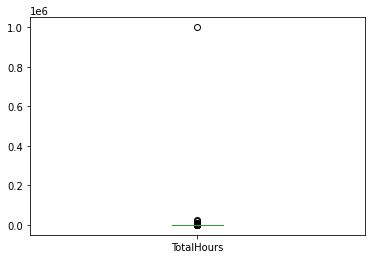

In [8]:
df.TotalHours.plot.box();

**There is an extremely large value in our data. Let's observe the distribution without it**

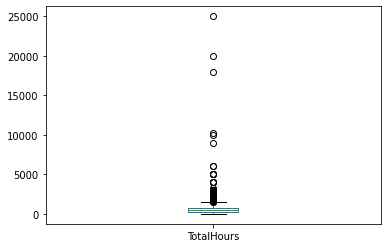

In [9]:
df[df.TotalHours < df.TotalHours.max()].TotalHours.plot.box();

**In fact, there are still some outliers above 3000**

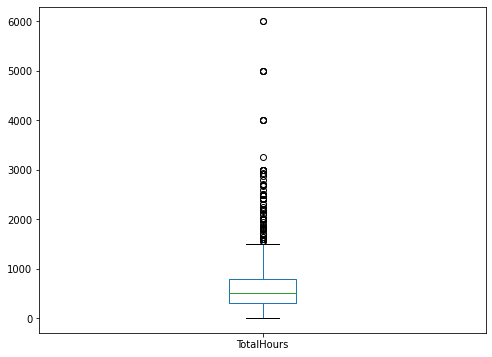

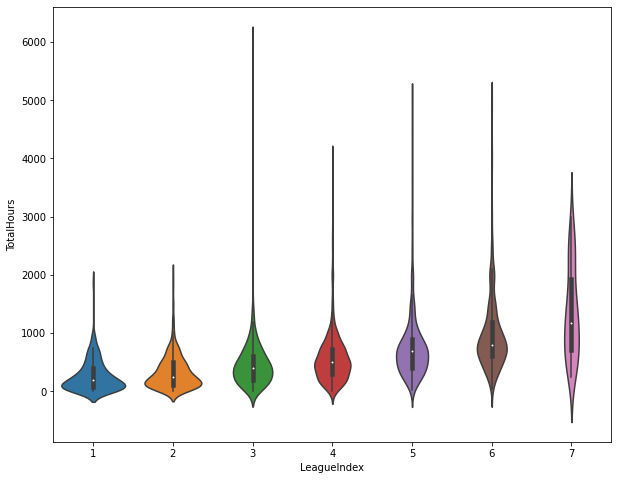

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
df[df.TotalHours < 8000].TotalHours.plot.box(ax=ax);
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=df[df.TotalHours < 8000],x='LeagueIndex', y='TotalHours', ax=ax);

Based on the plots we created, we found that there were some outliers in our dataset. There was even a player that logged about a million hours into the game. Whether or not this was a mistake or an artifact of the data collection process, we have to figure out a way to handle outliers in the dataset. Taking a closer look into the box plot created after ignoring the outlier, we find that there's a few more players that logged over ten thousand hours into the game. Although is a lot of time, it does sound like a plausible amount of time as there are some professional streamers that invest that much time nowadays. Given this, we can argue that setting a critical limit at about 10,000 hours is reasonable, meaning instead of removing a smaller subset of players that log large amount of time in the game, we could keep them an instead replace their values with other players within the same rank.

Now that we've mentioned the outlier, we can continue to analyze this feature. We can clearly see that the `TotalHours` follows a trend, higher ranked players have amounted a lot of hours in the game. We do note that rank 8 players are missing in this last plot. Let's analyze further.

In [11]:
df[['LeagueIndex','TotalHours']].groupby('LeagueIndex').agg({'TotalHours': lambda x: x.isnull().sum()}).astype(int)

,TotalHours
LeagueIndex,
1,0
2,0
3,0
4,0
5,2
6,0
7,0
8,55


It seems that all the missing features, which make up about 1.6% of the data, belong to professional league rank players. Given this new information, let's take a further look into the different classes themselves to make a better decision on how to handle the missing data.

In [12]:
df.LeagueIndex.value_counts().sort_index()

1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
Name: LeagueIndex, dtype: int64

Been a competitive player myself, I understand how the rank systems work. In this case *master* and *Grand Master* ranked are only achieved by a small percentage of the population, and this seems to be the case here with pro players having a smaller percentage. Given that the master, grand master and pro players class also make up a small percentage of this dataset, along with the fact that the distribution of the features we previously analyzed showed a trend that higher rank players tend to spend more time on the game an be younger, it would be ideal to group all this classes together.

Before we change the data, let's keep analyzing the rest of the features. We will break the rest of the features into groups, we'll start off by observing action features, meaning features that quanify a player's action, this includes `APM`, `SelecByHotKeys`, `AssignToHotkeys`, and `UniqueHotkeys`. Then we will analyze map related features, this include `MinimapAttacks`, `MinimapRightClicks`, and `TotalMapExplored`. We will then analyze features that quantify a players reaction time, this include `NumberOfPACs`, `GapBetweenPACs`, `ActionLatency`, and `ActionsInPAC`. Lastly, we will explore how players in different rank make use of their time and resources by observing `WorkersMade`, `UniqueUnitsMade`, `ComplexUnitsMade`, and `ComplexAbilitiesUsed`.

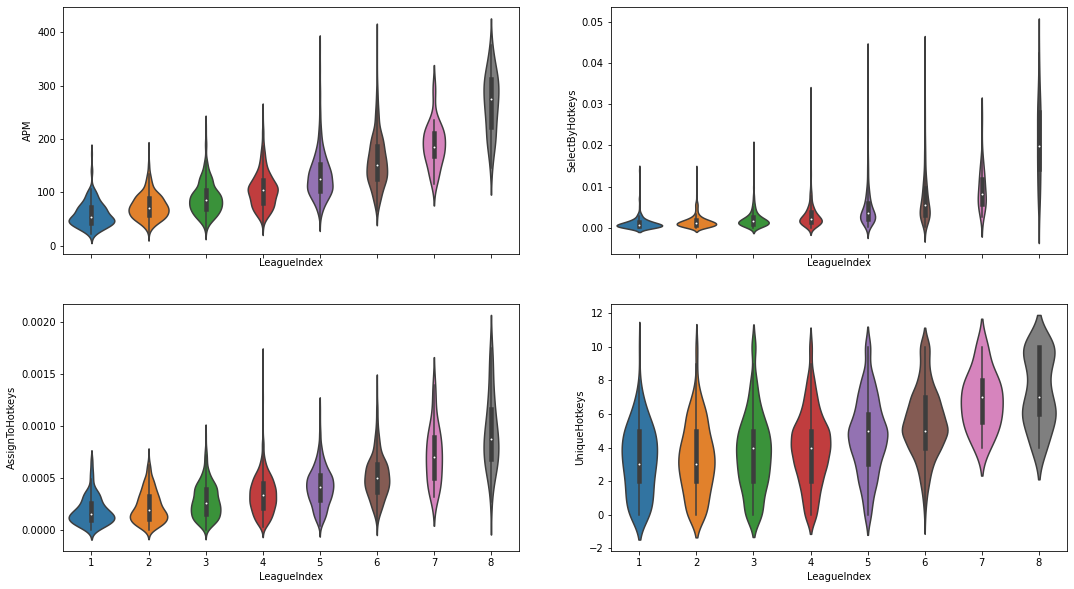

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), sharex=True)

sns.violinplot(data=df, x='LeagueIndex', y='APM', ax=axes[0, 0])
sns.violinplot(data=df, x='LeagueIndex', y='SelectByHotkeys', ax=axes[0, 1])
sns.violinplot(data=df, x='LeagueIndex', y='AssignToHotkeys', ax=axes[1, 0])
sns.violinplot(data=df, x='LeagueIndex', y='UniqueHotkeys', ax=axes[1, 1])

plt.show()

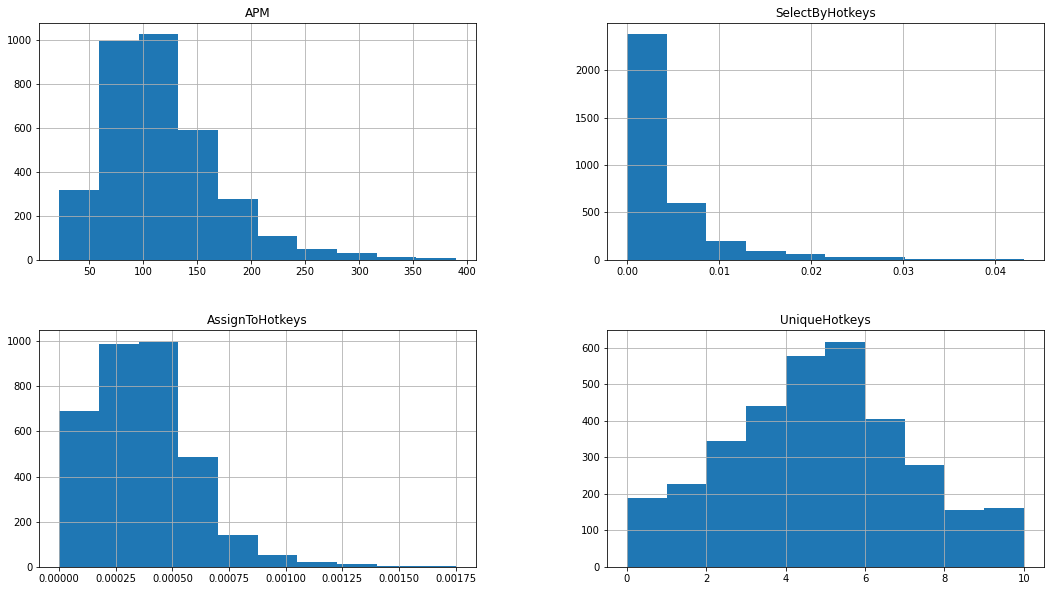

In [14]:
keys = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
df.loc[:, keys].hist(ax=ax);

Let us first discuss the violing plots. All the features ploted here seem to show an upward trend with some overlapping among the leagues. The histograms on the other hand tell a slightly different story although all features except `UniqueHotkeys` seem to be right skewed while the latter is approximately normal. The skewness on `APM` can be simply explained by the fact that better players can perform more actions per minute. `SelectByHotkeys` is also right skewed but we note that only a small fraction of players make use of it, the skewenes towards higher level players indicates that these players become more efficient as they rank up. `AssignToHotkeys` also shows slight skewenes, but is difficult to make conclusion about his feature as not that many players use them as seen in the violin plot. The normal distribution on `UniqueHotkeys` is not surpising. The violin plot indicates that there isn't an odd number of hotkeys but the amount of them use per rank slightly increases with rank.

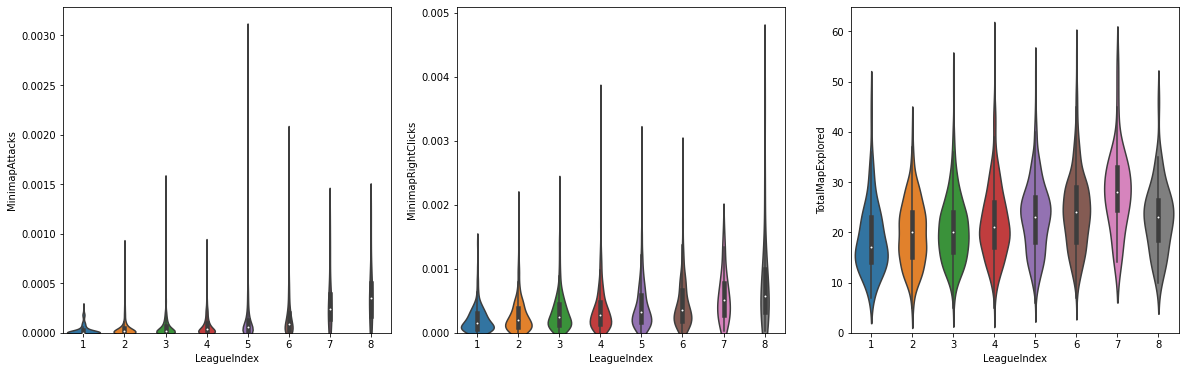

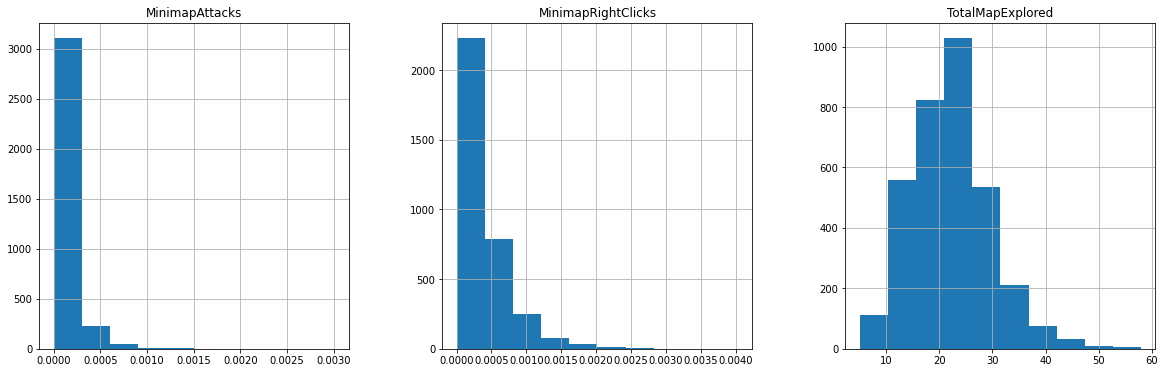

In [15]:
keys = ['MinimapAttacks', 'MinimapRightClicks', 'TotalMapExplored']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.violinplot(data=df, x='LeagueIndex', y=keys[0], ax=axes[0])
axes[0].set_ylim(0)
sns.violinplot(data=df, x='LeagueIndex', y=keys[1], ax=axes[1])
axes[1].set_ylim(0)
sns.violinplot(data=df, x='LeagueIndex', y=keys[2], ax=axes[2])
axes[2].set_ylim(0)

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
df.loc[:, keys].hist(ax=ax)
plt.show()

Let's no observe what the data indicates about a players ability to use the map. The violin plots indicate little to no use of the minimap, but it also shows more usage as the rank increases which makes sense as players tend to make the best out their tools to improve gameplay. A players ability to explore the map shows an odd pattern as its close to steady as rank increases and then drops as you reach higher rank.

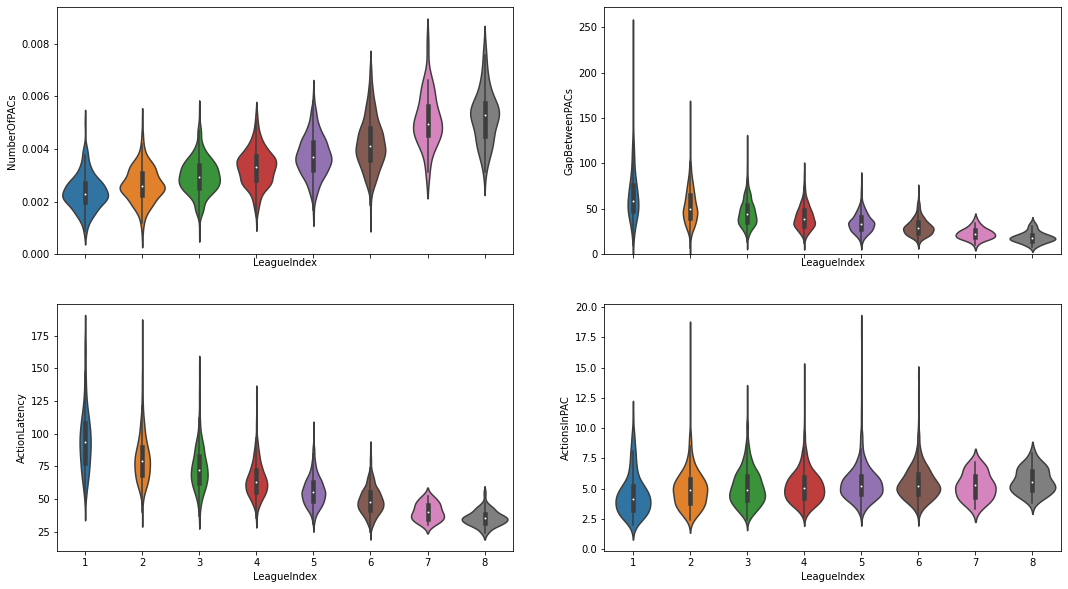

In [16]:
keys = ['NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), sharex=True)

sns.violinplot(data=df, x='LeagueIndex', y=keys[0], ax=axes[0, 0])
axes[0, 0].set_ylim(0)
sns.violinplot(data=df, x='LeagueIndex', y=keys[1], ax=axes[0, 1])
axes[0, 1].set_ylim(0)
sns.violinplot(data=df, x='LeagueIndex', y=keys[2], ax=axes[1, 0])
sns.violinplot(data=df, x='LeagueIndex', y=keys[3], ax=axes[1, 1])

plt.show()

Of all the features we've analyzed so far, this latter plot seems to be the most intuitive. All the plots show the same trend, the higher the rank, specially 'professional leagues', the faster the reaction time meaning higher rank players are (as they should) able to perform more actions within a short amount of time. We can then argue that **PAC** features have the potential to be a good predictor.

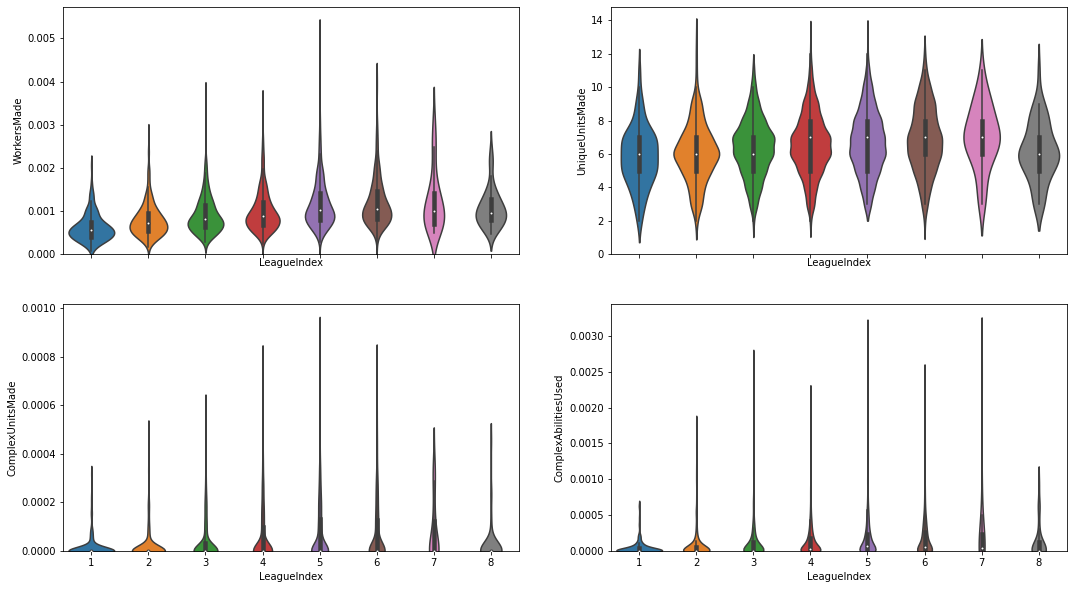

In [17]:
keys = ['WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10), sharex=True)

sns.violinplot(data=df, x='LeagueIndex', y=keys[0], ax=axes[0, 0])
axes[0, 0].set_ylim(0)
sns.violinplot(data=df, x='LeagueIndex', y=keys[1], ax=axes[0, 1])
axes[0, 1].set_ylim(0)
sns.violinplot(data=df, x='LeagueIndex', y=keys[2], ax=axes[1, 0])
axes[1, 0].set_ylim(0)
sns.violinplot(data=df, x='LeagueIndex', y=keys[3], ax=axes[1, 1])
axes[1, 1].set_ylim(0)

plt.show()

We end our explorations of the features with this last set that focus on players tactics. We would expect to find some type of pattern out of this feature but the plots show no discernable patter to explore. However, we do note that not that many players use complex abilities nor invest resources into complex units.

Let's now take a look at how the features relate to each other by using seaborns heatmap.

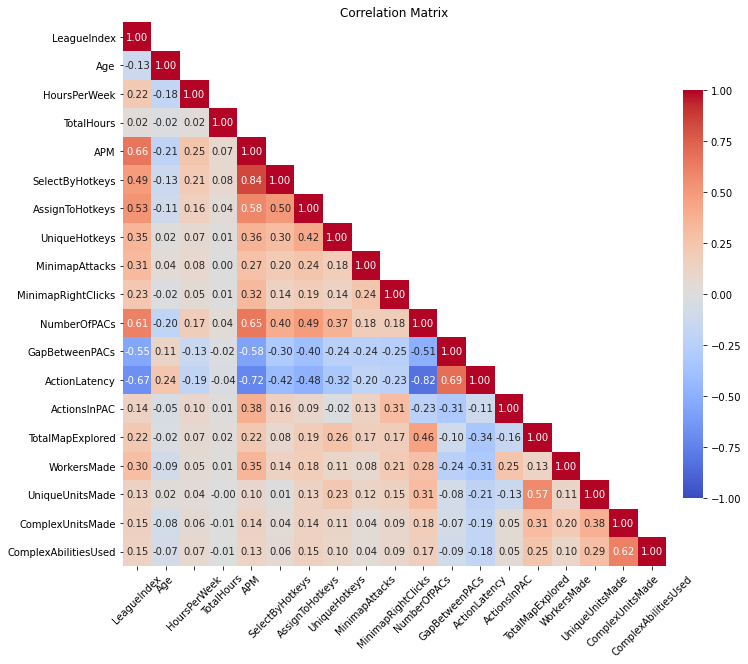

In [18]:
corr_matrix = df.corr()
mask = np.triu(corr_matrix)
mask[np.diag_indices_from(mask)] = False

fig, ax = plt.subplots(figsize=(30, 10))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
            square=True, ax=ax, vmin=-1, vmax=1, fmt='.2f',
            cbar_kws={"shrink": .75, "pad": 0.01})
plt.title('Correlation Matrix')
ax.tick_params(axis='x', rotation=45)
plt.show()

By analyzing the correlation of other features with respect to each other and the target variable, we gain insight into potential predictive variables and potential multicollinearity. In statistics, multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy, this then adds redundancy to our data which can hinder a models ability to make reliable predictions.

Based on the heatmap we ploted we can already see that `APM`, `NumberOfPACs`, `GapBetweenPACs` and `ActionLatency` have a strong relationship with the target variable and could serve as strong predictive variables. However, the last three features mentioned also have strong correlations with `APM`. To make a better decision, a data driven decision, we can apply different techniques to choose the best features to keep. For this project we will perform a mutual information gain and a $\chi^2$ analysis of variables to choose the best features for our model.

Before moving on to choosing our features, we still have to handle the missing data for `Age`, `HoursPerWeek` and `TotalHours`. Since we will be combining ranks to prevent imbalance in our dataset, we will replace the missing values for `Age` by taking the median age of the consolidated class. We will replace the missing values of `HoursPerWeek` and `TotalHours` with the 99th percentile of the new class. We also need to handle the outliers in `TotalHours`.

In [19]:
data = pd.read_csv(datadir, na_values='?')
data.drop('GameID', axis=1, inplace=True)
# Consolidate classes
data.LeagueIndex.replace({7:6, 8:6, 6:6}, inplace=True)


# Handle outliers in total hours
limit = 10000
replaceindx = data.query('TotalHours > %i' % limit).index
replace_values = data[['LeagueIndex', 'TotalHours']].groupby('LeagueIndex').agg(lambda x: np.nanpercentile(x, 99)).TotalHours
replace_values = np.array(replace_values[np.array(data.loc[replaceindx].LeagueIndex)])
data.loc[replaceindx, 'TotalHours'] = replace_values

# Replace missing Ages with classes median
age_median = data.loc[data.LeagueIndex == 6, 'Age'].median()
data.Age.replace(np.nan, age_median, inplace=True)

# Replace Hours Per Week with classes 99th percentile
hpw_replace_value = np.percentile(data.loc[(data.LeagueIndex == 6) & (~data.HoursPerWeek.isnull()), 'HoursPerWeek'], 99)
data.HoursPerWeek.replace(np.nan, hpw_replace_value, inplace=True)

# Replace Total Hours with classes 99th percentile
th_replace_value = np.percentile(data.loc[(data.LeagueIndex == 6) & (~data.TotalHours.isnull()), 'TotalHours'], 99)
data.TotalHours.replace(np.nan, th_replace_value, inplace=True)

# Store target variable
target = data.LeagueIndex.copy()
data.drop('LeagueIndex', axis=1, inplace=True)

## Feature Selection
___

Now that we have explored and cleaned up our dataset, we can begin to determine what features can be used for our modeling process. As we mentioned in the previous section, we will be performing a mutual information gain and a $\chi^2$ analysis of variables to choose the best features for our model. We will start off by scaling our dataset, due to the diversity of features in the dataset, we have a different range of values. Scaling usually depends on the type of feature (i.e. numerical vs descriptive) as well as the distribution of such feature. For this project we will perform a uniform Min Max scaling that will ensure all the features in our data range from 0 to 1. This step is also necessary for the modeling process as is easier for the models to understand this type of scaling.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [21]:
from sklearn.feature_selection import mutual_info_classif, chi2

# Information Gain Analysis
X = scaled_df
y = target

# Calculate information gain for each feature
information_gain = mutual_info_classif(X, y, n_neighbors=4)
feature_information_gain = dict(zip(X.columns, information_gain))

info_pd = pd.DataFrame({"Features": feature_information_gain.keys(), 
                      "Scores": feature_information_gain.values()})

# χ-sqr analysis
χ2_score = chi2(X, y)[0]
feature_χ2 = dict(zip(X.columns, χ2_score))

χ2_pd = pd.DataFrame({"Features": feature_χ2.keys(), 
                      "Scores": feature_χ2.values()})

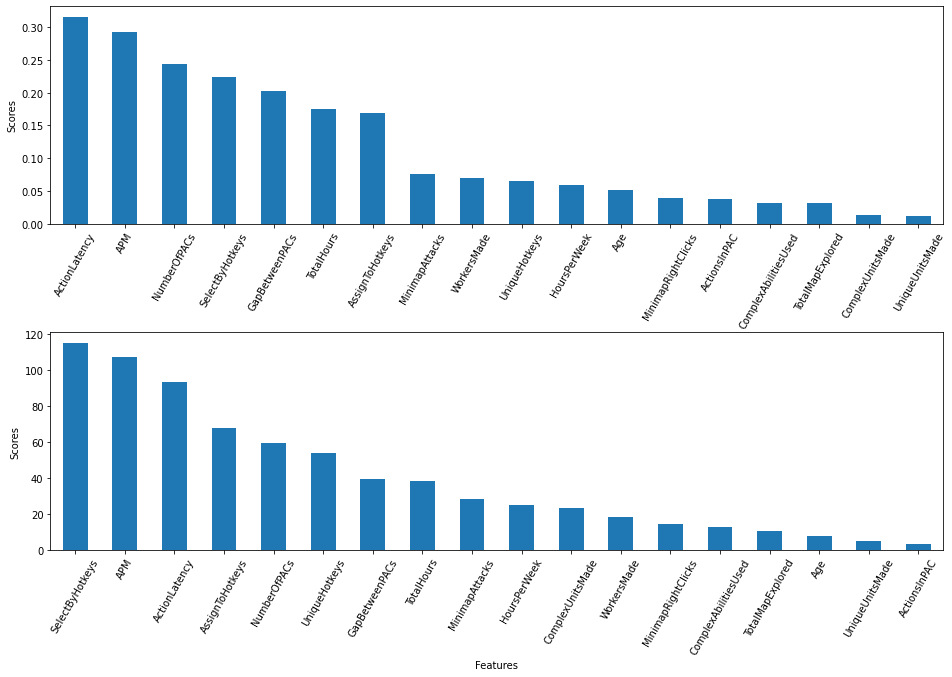

In [22]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.5)

info_pd.sort_values(by='Scores', ascending=False).plot.bar(x='Features', y='Scores', ax=ax[0])
ax[0].tick_params(axis='x', rotation=60)
ax[0].get_legend().remove()
ax[0].set_ylabel('Scores')

χ2_pd.sort_values(by='Scores', ascending=False).plot.bar(x='Features', y='Scores', ax=ax[1])
ax[1].tick_params(axis='x', rotation=60)
ax[1].get_legend().remove()
ax[1].set_ylabel('Scores');

Visual inspection of our $\chi^2$ and information gain analysis shows that approximately the first 7 features in our dataset indicate a strong predictive variable. We could perform further investigation to determine the optimal number of features to keep but at this point, we will pick the top 7 features on both sets and remove the rest.

In [25]:
k = 7
best_info = info_pd.sort_values('Scores', ascending=False).iloc[:k, 0]
best_χ2 = χ2_pd.sort_values('Scores', ascending=False).iloc[:k, 0]
features = np.union1d(best_χ2, best_info).astype(str)

## Feature Engineering
___
Now that we have explored and cleaned up our dataset, we can start creating some extra features that may prove useful. For this dataset we will create the following features:

* `AgeBin` : individuals will be split into three different categories; 16-24 will be assing to young(1), 25-34 Adults(2), 35 and above Veterans(3).

* `PlaytimeIntensity` : To capture the relationship between the hours played per week and the overall total hours played by a player, estimating how much of their total playtime is dedicated to a weekly basis (i.e. `HoursPerWeek`/`TotalHours`).

* `SelectByHotkeysRatio`: Ratio of `SelectByHotkeys` to `APM`. This ratio represents the proportion of unit or building selections made using hotkeys relative to the overall action per minute. It provides insights into the efficiency of using hotkeys in relation to the player's overall actions.

* `MinimapActionsRatio`: Ratio of the sum of `MinimapAttacks` and `MinimapRightClicks` to `APM`. This ratio represents the proportion of actions taken on the minimap relative to the overall action per minute. It reflects the player's reliance on the minimap for attacking and movement actions.

* `PACsPerActionRatio`: Ratio of `NumberOfPACs` to `APM`. This ratio indicates the average number of PACs (Predefined Action Chains) per action made. It measures the complexity or efficiency of executing predefined sequences of actions within the overall actions performed.

* `WorkersToUnitsRatio`: Ratio of `WorkersMade` to the sum of `WorkersMade`, `UniqueUnitsMade`, `ComplexUnitsMade`. This ratio quantifies the proportion of worker units (SCVs, drones, and probes) trained relative to the total number of units produced. It provides insights into the player's focus on economic development compared to unit production.

* `EconomyManagement`: This feature could be derived by combining the `WorkersMade` and `TotalMapExplored`. It represents the player's ability to efficiently manage their economy and gather resources while maintaining map awareness.

* `APM_TotalMapExplored`: Interaction between `APM` and `TotalMapExplored`. This interaction term attempts to capture the relationship between the speed of actions performed by the player and the extent of map exploration. It can indicate whether higher APM is associated with more extensive map coverage.

Based on the features we are choosing to create, we are attempting to focus on features that capture strategic or **performance-related** aspects of StarCraft gameplay. Given that *Starcraft* is real-time strategy game, efficiency and fast action making can better dictate the proficiency of a player. 

In [16]:
def age_bin(age):
    if age < 25:
        return 1
    if 25 <= age < 35:
        return 2
    return 3

In [17]:
# Binned features
df['AgeBin'] = df.Age.apply(age_bin)

# Ratio features
df['PlaytimeIntensity'] = df.HoursPerWeek / df.TotalHours
df['SelectByHotkeysRatio'] = df.SelectByHotkeys / df.APM
df['MinimapActionsRatio'] = (df.MinimapAttacks + df.MinimapRightClicks) / df.APM
df['PACsPerActionRatio'] = df.NumberOfPACs / df.APM
df['WorkersToUnitsRatio'] = df.WorkersMade / (df.WorkersMade + df.UniqueUnitsMade + df.ComplexUnitsMade)
df['EconomyManagement'] = df.WorkersMade / df.TotalMapExplored

# Relationship features
df['APM_TotalMapExplored'] = df.APM * df.TotalMapExplored

Now that we have create a few performance-related features, let's take a preliminary look at the impact and relationship they have with our target variable `LeagueIndex`. We'll start off by revisiting or correlation analysis done at the end of the previous section. However, before deciding what features to keep, we will also perform an information gain analysis using a decision tree model to measure the information gain or entropy reduction provided by each feature. Information gain quantifies the reduction in uncertainty about the target variable after considering a specific feature. 

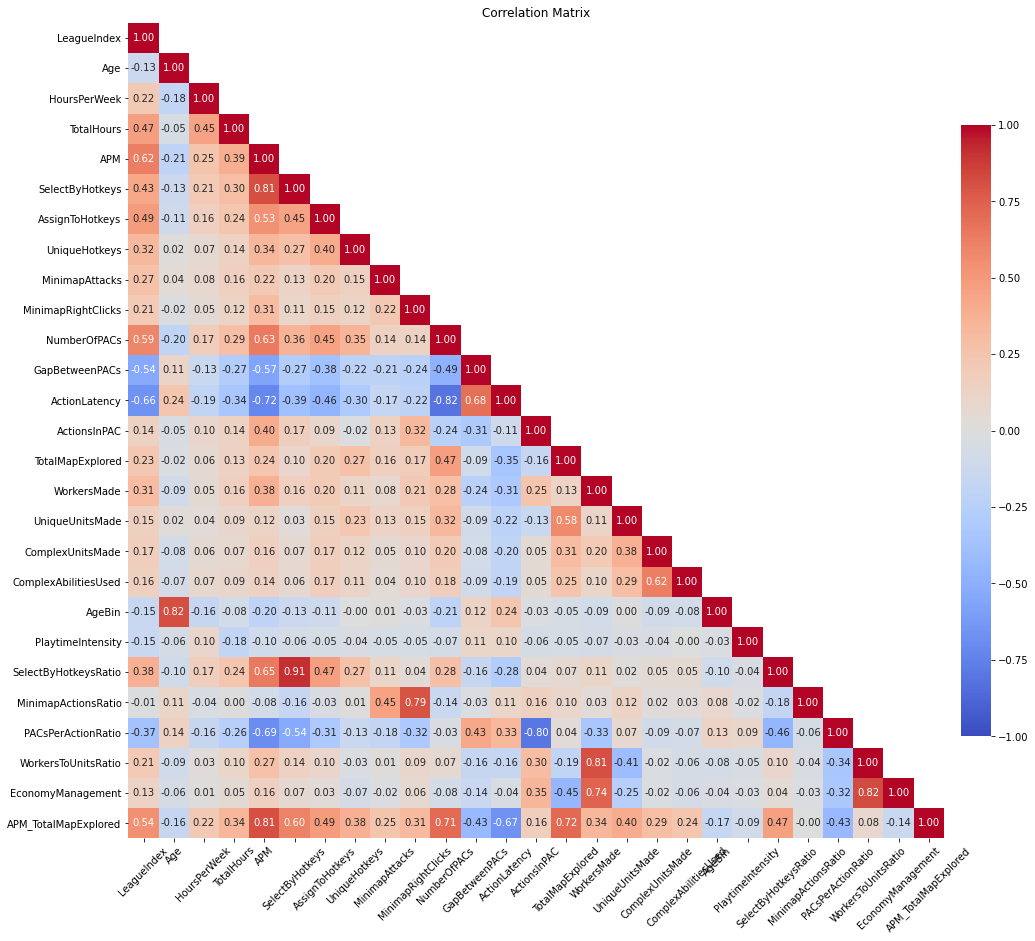

In [18]:
corr_matrix = df.drop(columns=['GameID']).corr()
mask = np.triu(corr_matrix)
mask[np.diag_indices_from(mask)] = False

fig, ax = plt.subplots(figsize=(30, 15))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
            square=True, ax=ax, vmin=-1, vmax=1, fmt='.2f',
            cbar_kws={"shrink": .75, "pad": 0.01})
plt.title('Correlation Matrix')
ax.tick_params(axis='x', rotation=45)
plt.show()

Since we're only interested in the relationships with the target variable, let us only focus on those correlation coefficients.

In [19]:
corr_matrix['LeagueIndex'].sort_values(ascending=False)

LeagueIndex             1.000000
APM                     0.624037
NumberOfPACs            0.589134
APM_TotalMapExplored    0.543823
AssignToHotkeys         0.487350
TotalHours              0.474803
SelectByHotkeys         0.428657
SelectByHotkeysRatio    0.376841
UniqueHotkeys           0.322143
WorkersMade             0.310320
MinimapAttacks          0.270286
TotalMapExplored        0.230511
HoursPerWeek            0.217901
WorkersToUnitsRatio     0.208901
MinimapRightClicks      0.206153
ComplexUnitsMade        0.171137
ComplexAbilitiesUsed    0.156120
UniqueUnitsMade         0.151794
ActionsInPAC            0.139995
EconomyManagement       0.131108
MinimapActionsRatio    -0.013057
Age                    -0.127825
PlaytimeIntensity      -0.147323
AgeBin                 -0.154052
PACsPerActionRatio     -0.369077
GapBetweenPACs         -0.537423
ActionLatency          -0.659950
Name: LeagueIndex, dtype: float64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

## Information Gain Analysis
X = df.drop(columns=['LeagueIndex', 'GameID'])
y = df.LeagueIndex

# Initialize a decision tree classifier
tree = DecisionTreeClassifier(random_state=53)

# Fit the decision tree on the data
tree.fit(X, y)

# Calculate information gain for each feature
information_gain = mutual_info_classif(X, y)
feature_information_gain = dict(zip(X.columns, information_gain))
sorted_feature_information_gain = dict(sorted(feature_information_gain.items(), key=lambda x: x[1], reverse=True))

# Print the feature names and their corresponding information gain values
print('{:<20} | {:<5}'.format('Feature', 'Information Gain'))
print("__"*18)
for feature, gain in sorted_feature_information_gain.items():
    print('{:<20} | {:<5}'.format(feature, round(gain, 3)))
    
print("__"*18)

Feature              | Information Gain
____________________________________
ActionLatency        | 0.313
APM                  | 0.287
NumberOfPACs         | 0.235
SelectByHotkeys      | 0.209
APM_TotalMapExplored | 0.203
GapBetweenPACs       | 0.186
AssignToHotkeys      | 0.162
TotalHours           | 0.141
PlaytimeIntensity    | 0.102
SelectByHotkeysRatio | 0.088
PACsPerActionRatio   | 0.076
WorkersMade          | 0.075
MinimapAttacks       | 0.062
UniqueHotkeys        | 0.059
ActionsInPAC         | 0.05 
HoursPerWeek         | 0.041
MinimapRightClicks   | 0.037
ComplexUnitsMade     | 0.034
WorkersToUnitsRatio  | 0.03 
TotalMapExplored     | 0.028
ComplexAbilitiesUsed | 0.027
AgeBin               | 0.026
Age                  | 0.024
EconomyManagement    | 0.012
UniqueUnitsMade      | 0.011
MinimapActionsRatio  | 0.0  
____________________________________


In [21]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(random_state=53)
rfr.fit(X, y)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
sorted_indx = np.argsort(importances)[::-1]

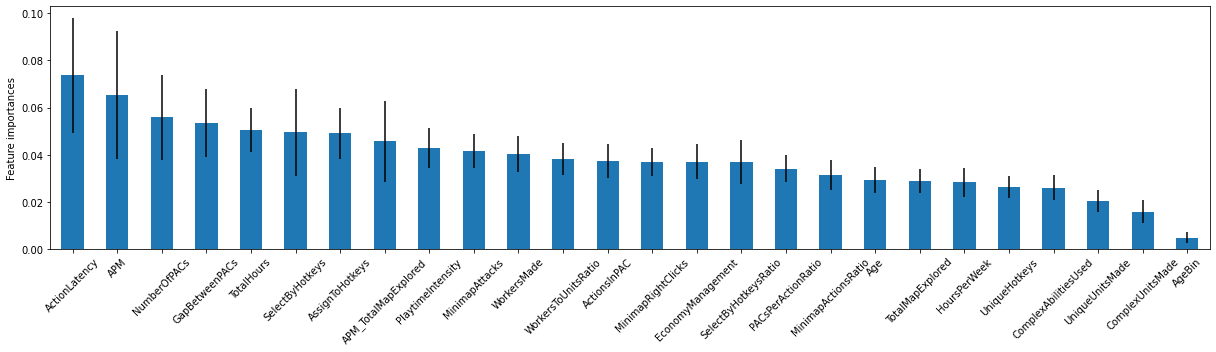

In [22]:
importancesdf = pd.Series(importances[sorted_indx], index=X.columns[sorted_indx])

fig, ax = plt.subplots(figsize=(17, 5))
importancesdf.plot.bar(yerr=std[sorted_indx], ax=ax)
ax.set_ylabel("Feature importances")
ax.tick_params(axis='x', rotation=45)
fig.tight_layout()

### Statistical Analysis of Features

Let's break down the results of our analysis. We started off by analyising the correlation of all the present features with respect to the target variable. Although we found a lot strong correlation coefficients, we focus on the variables that showed weaker correlations, this includes `MinimpaActionsRatio`, `Age`, `AgeBin`, `UniqueUnitsMade` among other that had a correlation coefficient lower than 0.15 and -0.15. Although we make an important note that correlation does not indicate causation, having strong correlation can help make predictions.

We then performed an information gain analysis. Here we found once again that variables such as `MinimpaActionsRatio`, `Age`, `UniqueUnitsMade`, and `AgeBin` provided the least amount of *Information gain*. Variables with low information gain have limited predictive power in determining the target variable. These variables do not provide significant insights or contribute much to the prediction of the target variable compared to other features.

Lastly, we trained a simple machine learning algorith to determine the feature importance of the avilable features. Here once again we find that variables such as `Age`, `UniqueUnitsMade`, and `AgeBin` provided low importance based on our trained Random Forest Classifier evaluation. The reason we mentioned this specific variables in our analysis is due to the fact that they appear to provide the least value to our analysis accross different methods. Variables with consistently low importance across different modeling techniques and evaluation metrics may be considered for removal from the feature set. Removing such variables can simplify the model, reduce noise, and potentially improve model performance. Here's a list of the variables we will dropping:

* `Age`
* `AgeBin`
* `UniqueUnitsMade`
* `MinimapActionsRatio`
* `UniqueUnitsMade`
* `ComplexAbilitiesUsed`
* `TotalMapExplored`
* `HoursPerWeek`
* `GameID` - although it wasn't used for analysis, unique ID values do not provide any value so conventionally it's dropped.

In [23]:
removed_features = [
    'Age', 'AgeBin', 'UniqueUnitsMade', 'MinimapActionsRatio', 'GameID'
    'UniqueUnitsMade', 'ComplexAbilitiesUsed', 'TotalMapExplored', 'HoursPerWeek'
]

At this stage of our project, we note that we decided to drop 'Professional Leagues' rank from our dataset. The decision was made solely based on the fact that `Age`, `HoursPerWeek` and `TotalHours` contained missing values for this subset of players. Given that our analyisis shows that `Age` and `HoursPerWeek` can be removed from the dataset, we can revisit our decision. We will reintroduce this subset of players into our dataset and perform unsupervised learning to estimate `TotalHours` and `HoursPerWeek`. The latter feature needs to be included since we have created features that make use of it.

In [24]:
# Step 1: Data Preparation and Handling Missing Values
data = pd.read_csv(datadir, na_values='?')
target = data[['LeagueIndex']] # Target variable should remain unchanged throughout preprocesing

# remove features we're not using for unsupervised learning
dropped_features = ['Age', 'LeagueIndex', 'GameID']
data.drop(columns=dropped_features, inplace=True)

# Replace missing values with a placeholder value
missing_value_placeholder = -1
data = data.replace(np.nan, missing_value_placeholder)

# Winsorize Total hours outliers by replacing outliers with the 95th percentile value
data.TotalHours = data.TotalHours.clip(upper=data.TotalHours.quantile(0.95))

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 2: Feature Scaling
standard_features = ['UniqueUnitsMade', 'UniqueHotkeys', 'TotalHours']
minmax_features = [feat for feat in data.columns if feat not in standard_features]

def scale_features(data, minmax_features, standard_features):
    '''
        Performs custom made scaling to specific features in the dataset. This
        function allows for flexibility in case there are different type of
        distributions on the dataset.
    '''
    # Perform Min-Max scaling on selected features
    min_max_scaler = MinMaxScaler()
    data_scaled_minmax = min_max_scaler.fit_transform(data[minmax_features])
    
    # Perform Standardization on selected features
    standard_scaler = StandardScaler()
    data_scaled_standard = standard_scaler.fit_transform(data[standard_features])
    
    # Combine the scaled features with the remaining unchanged features
    scaled_data = data.copy()
    scaled_data[minmax_features] = data_scaled_minmax
    scaled_data[standard_features] = data_scaled_standard
    
    return scaled_data, min_max_scaler, standard_scaler

scaled_data, _, _ = scale_features(data, minmax_features, standard_features)

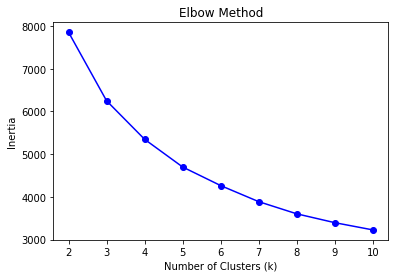

In [26]:
# Step 5: Optimize the K-means model, we can do this using the elbow method
# Define a range of k values
k_values = range(2, 11)
inertias = []

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [27]:
# Step 4: Apply K-means Clustering
num_clusters = 3  # Number of clusters, chosen using elbow method above
kmeans = KMeans(n_clusters=num_clusters, random_state=53)
kmeans.fit(scaled_data)

# Step 5: Cluster Assignment
data['Cluster'] = kmeans.labels_

In [28]:
# Step 6: Imputation
for feature in data.columns:
    # Iterate through each feature and fill in missing values with the mean or median of the corresponding cluster
    for cluster_id in range(num_clusters):
        cluster_values = data[data['Cluster'] == cluster_id][feature]
        cluster_median = np.median(cluster_values)
        
        # Fill missing values with the mean or median of the corresponding cluster
        data.loc[(data[feature] == missing_value_placeholder) & (data['Cluster'] == cluster_id), feature] = cluster_median